# K近邻算法实现与应用

## 最近邻算法
介绍 K 近邻算法之前，首先说一说最近邻算法。最近邻算法（Nearest Neighbor，简称：NN），其针对未知类别数据$x$，在训练集中找到与$x$最相似的训练样本$y$，用$y$的样本对应的类别作为未知类别数据$x$的类别，从而达到分类的效果。
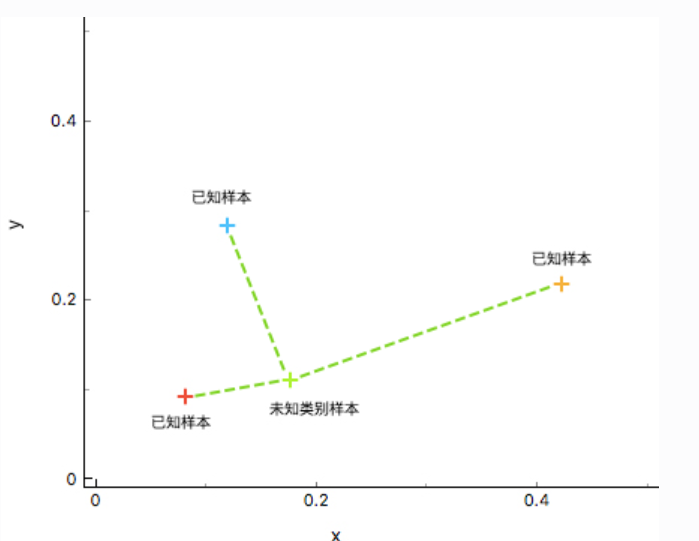

显然，这里将 绿色未知样本 类别判定与 红色已知样本 类别相同较为合适。

## K近邻算法
K 近邻（K-Nearest Neighbors，简称：KNN）算法是最近邻（NN）算法的一个推广，也是机器学习分类算法中最简单的方法之一。

KNN 算法的核心思想和最近邻算法思想相似，都是通过寻找和未知样本相似的类别进行分类。但 NN 算法中只依赖 1 个样本进行决策，在分类时过于绝对，会造成分类效果差的情况，为解决 NN 算法的缺陷，KNN 算法采用 K 个相邻样本的方式共同决策未知样本的类别，这样在决策中容错率相对于 NN 算法就要高很多，分类效果也会更好。
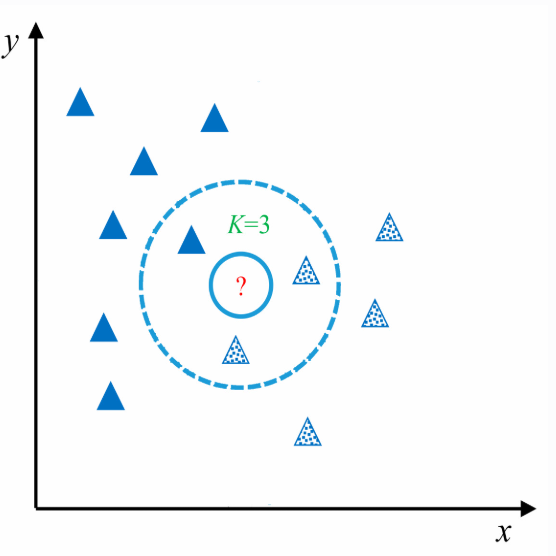

如上图所示，对于未知测试样本（图中 ？所示）采用 KNN 算法进行分类，首先计算未知样本和训练样本之间的相似度，找出最近 K 个相邻样本（在图中 K 值为 3，圈定距离？最近的 3 个样本），再根据最近的 K 个样本最终判断未知样本的类别。

## KNN算法实现

KNN 算法在理论上已经非常成熟，其简单、易于理解的思想以及良好的分类准确度使得 KNN 算法应用非常广泛。算法的具体流程主要是以下的 4 个步骤：

1. 数据准备：通过数据清洗，数据处理，将每条数据整理成向量。

2. 计算距离：计算测试数据与训练数据之间的距离。

3. 寻找邻居：找到与测试数据距离最近的 K 个训练数据样本。

4. 决策分类：根据决策规则，从 K 个邻居得到测试数据的类别。

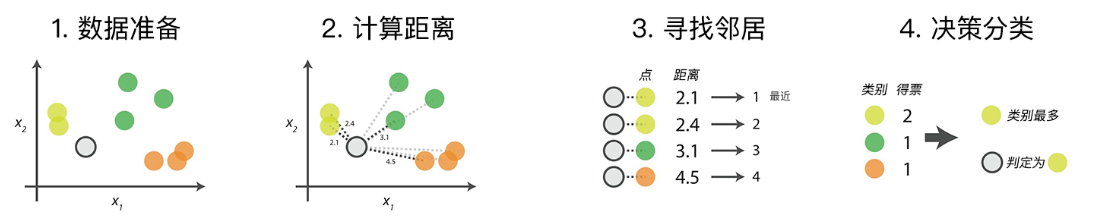

下面，我们尝试完成一个 KNN 分类流程。首先，生成一组示例数据，共包含 2 个类别 
$A$和$B$，其中每一条数据包含两个特征$x$和$y$。

In [2]:
import numpy as np


def create_data():
    features = np.array(
        [
            [2.88, 3.05],
            [3.1, 2.45],
            [3.05, 2.8],
            [2.9, 2.7],
            [2.75, 3.4],
            [3.23, 2.9],
            [3.2, 3.75],
            [3.5, 2.9],
            [3.65, 3.6],
            [3.35, 3.3],
        ]
    )
    labels = ["A", "A", "A", "A", "A", "B", "B", "B", "B", "B"]
    return features, labels

In [3]:
features, labels = create_data()
print("features: \n", features)
print("labels: \n", labels)

features: 
 [[2.88 3.05]
 [3.1  2.45]
 [3.05 2.8 ]
 [2.9  2.7 ]
 [2.75 3.4 ]
 [3.23 2.9 ]
 [3.2  3.75]
 [3.5  2.9 ]
 [3.65 3.6 ]
 [3.35 3.3 ]]
labels: 
 ['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B']


为了更直观地理解数据，接下来用 Matplotlib 下的 pyplot 包来对数据集进行可视化。为了代码的简洁，我们使用了 map 函数和 lambda 表达式对数据进行处理

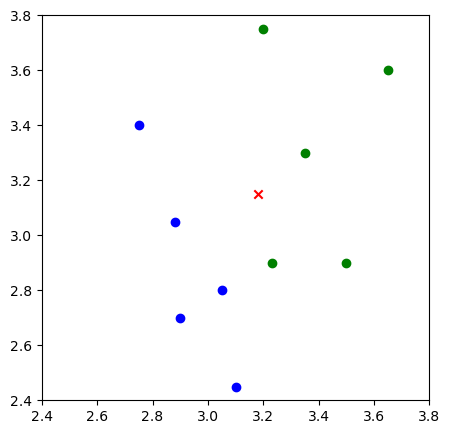

In [4]:
from matplotlib import pyplot as plt

%matplotlib inline

plt.figure(figsize=(5, 5))
plt.xlim((2.4, 3.8))
plt.ylim((2.4, 3.8))

x_feature = list(map(lambda x: x[0], features))  # 返回每个数据的 x 特征值
y_feature = list(map(lambda y: y[1], features))

plt.scatter(x_feature[:5], y_feature[:5], c="b")  # 在画布上绘画出"A"类标签的数据点
plt.scatter(x_feature[5:], y_feature[5:], c="g")
plt.scatter([3.18], [3.15], c="r", marker="x")  # 待测试点的坐标为 [3.1，3.2]

由上图所示，标签为$A$（蓝色圆点）的数据在画布的左下角位置，而标签为$B$（绿色圆点）的数据在画布的右上角位置，通过图像可以清楚看出不同标签数据的分布情况。其中 红色 x 点 即表示本次实验需预测类别的测试数据。

## 距离度量

在计算两个样本间的相似度时，可以通过计算样本之间特征值的距离进行表示。若两个样本距离值越大（相距越远），则表示两个样本相似度低，相反，若两个样本值越小（相距越近），则表示两个样本相似度越高。

计算距离的方法有很多，本实验介绍两个最为常用的距离公式：曼哈顿距离 和 欧式距离。这两个距离的计算图示如下：
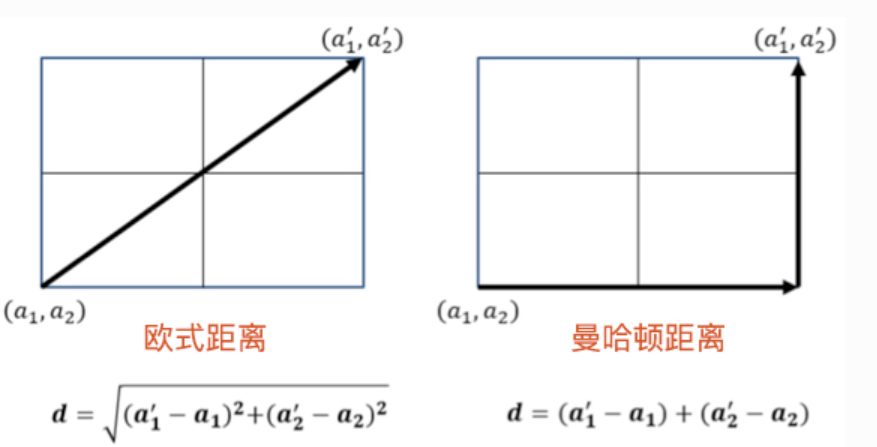

## 曼哈顿距离

曼哈顿距离又称马氏距离，公式如下：
$$
d_{man} = \sum_{i=1}^{N}|X_{i} - Y_{i}|
$$

其中：
* $X,Y$:两个数据点
* $N$:维度，每个数据中有$N$个特征值
* $X_{i},Y_{i}$:第$i$个特征值

In [5]:
def d_man(x, y):
    d = np.sum(np.abs(x - y))
    return d

In [6]:
x = np.array([3.1, 3.2])  # 任意指定 2 点计算
print("x:", x)

y = np.array([2.5, 2.8])
print("y:", y)

print(d_man(x, y))


x: [3.1 3.2]
y: [2.5 2.8]
1.0000000000000004


## 欧氏距离
欧氏距离源自$N$维空间中两点之间的距离公式，表达式如下：
$$
d_{euc} = \sqrt{\sum_{i=1}^{N}(X_i-Y_i)^2}
$$
其中：
* $X,Y$:两个数据点
* $N$:维度，每个数据中有$N$个特征值
* $X_{i},Y_{i}$:第$i$个特征值

In [7]:
def d_euc(x, y):
    d = np.sqrt(np.sum(np.square(x - y)))
    return d

In [8]:
x = np.random.random(10)  # 随机生成 10 个数的数组作为 x 特征的值
print("x:", x)

y = np.random.random(10)
print("y:", y)

distance_euc = d_euc(x, y)
print(distance_euc)

x: [0.64657204 0.63917526 0.39302858 0.36278467 0.89758606 0.90703119
 0.88747835 0.11555648 0.741496   0.11342659]
y: [0.79132944 0.02409558 0.01692309 0.97116873 0.02959385 0.27248062
 0.98504303 0.92240079 0.71681639 0.50857441]
1.6982922616612026


## 决策规则

在得到测试样本和训练样本之间的相似度后，通过相似度的排名，可以得到每一个测试样本的 K 个相邻的训练样本，那如何通过 K 个邻居来判断测试样本的最终类别呢？可以根据数据特征对决策规则进行选取，不同的决策规则会产生不同的预测结果，最常用的决策规则是：

* 多数表决法：多数表决法类似于投票的过程，也就是在 K 个邻居中选择类别最多的种类作为测试样本的类别。

* 加权表决法：根据距离的远近，对近邻的投票进行加权，距离越近则权重越大，通过权重计算结果最大值的类为测试样本的类别。

我们这里推荐使用多数表决法，这种方法更加简单，本次实验前面的配图即为多数表决法。


In [9]:
import operator


def majority_voting(class_count):
    # 多数表决函数
    sorted_class_count = sorted(
        class_count.items(), key=operator.itemgetter(1), reverse=True
    )
    return sorted_class_count


arr = {"A": 3, "B": 2, "C": 6, "D": 5}
majority_voting(arr)

[('C', 6), ('D', 5), ('A', 3), ('B', 2)]

在多数表决法的定义中，我们导入了 operater 计算模块，目的是对字典类型结构排序。可以从结果中看出函数返回的结果为票数最多的 C，得票为 6 次

## KNN算法实现
在学习完以上的各个步骤之后，KNN 算法也逐渐被勾勒出来。以下就是对 KNN 算法的完整实现，本次实验的距离计算采用欧式距离，分类的决策规则为多数表决法，定义函数 knn_classify()，其中函数的参数包括：

* test_data：用于分类的输入向量。

* train_data：输入的训练样本集。

* labels：样本数据的类标签向量。

* k：用于选择最近邻居的数目。


In [10]:
def knn_classify(test_data, train_data, labels, k):
    # KNN 方法完整实现
    distances = np.array([])  # 创建一个空的数组用于存放距离

    for each_data in train_data:  # 使用欧式距离计算数据相似度
        d = d_euc(test_data, each_data)
        distances = np.append(distances, d)

    sorted_distance_index = distances.argsort()  # 获取按距离从小到大排序后的索引
    sorted_distance = np.sort(distances)
    r = (sorted_distance[k] + sorted_distance[k - 1]) / 2  # 计算

    class_count = {}
    for i in range(k):  # 多数表决
        vote_label = labels[sorted_distance_index[i]]
        class_count[vote_label] = class_count.get(vote_label, 0) + 1

    final_label = majority_voting(class_count)
    return final_label, r

## 分类预测

在实现 KNN 算法之后，接下来就可以对我们未知数据 [3.18, 3.15] 开始分类，假定我们 K 值初始设定为 5，让我们看看分类的效果。

In [11]:
test_data = np.array([3.18, 3.15])
final_label, r = knn_classify(test_data, features, labels, 5)
final_label

[('B', 3), ('A', 2)]

在对数据 [3.18, 3.15] 实现分类之后，接下来我们同样用画图的方式形象化展示 KNN 算法决策方式。

In [12]:
def circle(r, a, b):  # 为了画出圆，这里采用极坐标的方式对圆进行表示 ：x=r*cosθ，y=r*sinθ。
    theta = np.arange(0, 2 * np.pi, 0.01)
    x = a + r * np.cos(theta)
    y = b + r * np.sin(theta)
    return x, y

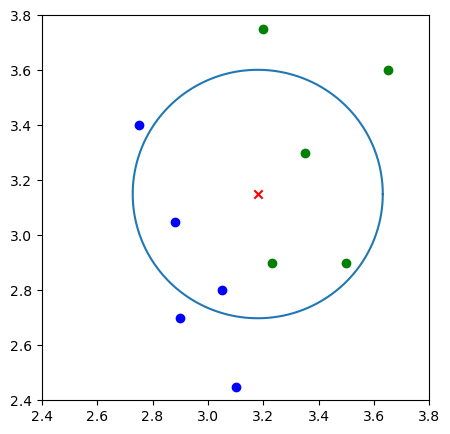

In [13]:
k_circle_x, k_circle_y = circle(r, 3.18, 3.15)

plt.figure(figsize=(5, 5))
plt.xlim((2.4, 3.8))
plt.ylim((2.4, 3.8))

x_feature = list(map(lambda x: x[0], features))  # 返回每个数据的 x 特征值
y_feature = list(map(lambda y: y[1], features))

plt.scatter(x_feature[:5], y_feature[:5], c="b")  # 在画布上绘画出"A"类标签的数据点
plt.scatter(x_feature[5:], y_feature[5:], c="g")
plt.scatter([3.18], [3.15], c="r", marker="x")  # 待测试点的坐标为 [3.1，3.2]
plt.plot(k_circle_x, k_circle_y)

如图所示，当我们 K 值为 5 时，与测试样本距离最近的 5 个训练数据（如蓝色圆圈所示）中属于$B$类的有 3 个，属于$A$类的有 2 个，根据多数表决法决策出测试样本的数据为$B$类。

在 KNN 算法中，K 值的选择对数据的最终决策有很大的影响，下面我们引入 ipywidgets 模块更加清晰的反映 K 的选择对预测结果影响。其中 ipywidgets 模块是 jupyter 中的一个交互式模块，可以通过下拉菜单选择不同的 K 值进行判断并预测未知点最后的种类。

In [14]:
from ipywidgets import interact, fixed


def change_k(test_data, features, k):
    final_label, r = knn_classify(test_data, features, labels, k)
    k_circle_x, k_circle_y = circle(r, 3.18, 3.15)

    plt.figure(figsize=(5, 5))
    plt.xlim((2.4, 3.8))
    plt.ylim((2.4, 3.8))

    x_feature = list(map(lambda x: x[0], features))  # 返回每个数据的 x 特征值
    y_feature = list(map(lambda y: y[1], features))

    plt.scatter(x_feature[:5], y_feature[:5], c="b")  # 在画布上绘画出"A"类标签的数据点
    plt.scatter(x_feature[5:], y_feature[5:], c="g")
    plt.scatter([3.18], [3.15], c="r", marker="x")  # 待测试点的坐标为 [3.1，3.2]
    plt.plot(k_circle_x, k_circle_y)

In [15]:
interact(
    change_k, test_data=fixed(test_data), features=fixed(features), k=[3, 5, 7, 9]
)  # 可交互式绘图

interactive(children=(Dropdown(description='k', options=(3, 5, 7, 9), value=3), Output()), _dom_classes=('widg…

<function __main__.change_k(test_data, features, k)>

从图中可以直观的看到，不同的 K 值预测出不同的结果。接下来，我们使用 KNN 算法对真实数据集进行分类预测。

## 加载数据集
本次使用的数据集为丁香花数据集course-9-syringa.csv，丁香花数据集包含 daphne，syringa 和 willow 等 3 个种类，其中每个种类包含 150 条数据，每条数据包含 4 个特征值：花萼长度，花萼宽度，花瓣长度，花瓣宽度。利用 Pandas 将其导入成 DataFrame 格式。


In [16]:
import pandas as pd

lilac_data = pd.read_csv("course-9-syringa.csv")
lilac_data.head()  # 预览前 5 行

,sepal_length,sepal_width,petal_length,petal_width,labels
0,5.1,3.5,2.4,2.1,daphne
1,4.9,3.0,2.7,1.7,daphne
2,4.7,3.2,2.2,1.4,daphne
3,4.6,3.1,1.6,1.7,daphne
4,5.0,3.6,1.6,1.4,daphne


为了使我们对数据更加了解，同样我们用 plt 将各个数据的特征绘制出来。由于丁香花数据集有 4 个特征值，在二维空间中无法直接表示，所以只有采用特征组合的方式绘画特征分布图。下面将 4 个特征，进行两两组合得到 6 种情况，并采用子图的方式进行绘制。

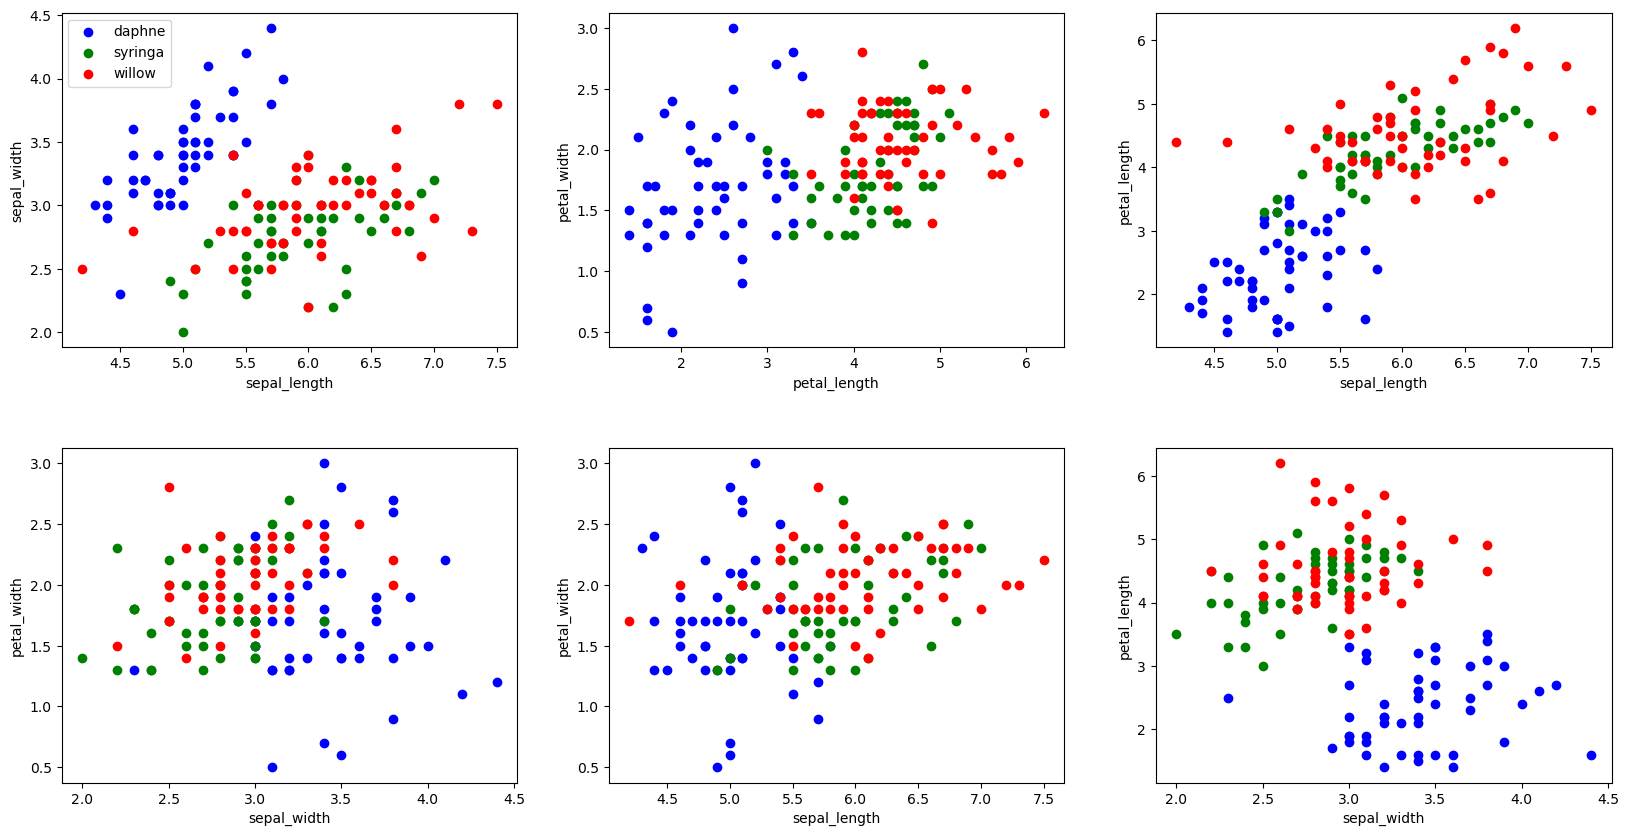

In [17]:
"""绘制丁香花特征子图
"""
fig, axes = plt.subplots(2, 3, figsize=(20, 10))  # 构建生成 2*3 的画布，2 行 3 列
fig.subplots_adjust(hspace=0.3, wspace=0.2)  # 定义每个画布内的行间隔和高间隔

axes[0, 0].set_xlabel("sepal_length")  # 定义 x 轴坐标值
axes[0, 0].set_ylabel("sepal_width")  # 定义 y 轴坐标值
axes[0, 0].scatter(lilac_data.sepal_length[:50], lilac_data.sepal_width[:50], c="b")
axes[0, 0].scatter(
    lilac_data.sepal_length[50:100], lilac_data.sepal_width[50:100], c="g"
)
axes[0, 0].scatter(lilac_data.sepal_length[100:], lilac_data.sepal_width[100:], c="r")
axes[0, 0].legend(["daphne", "syringa", "willow"], loc=2)  # 定义示例

axes[0, 1].set_xlabel("petal_length")
axes[0, 1].set_ylabel("petal_width")
axes[0, 1].scatter(lilac_data.petal_length[:50], lilac_data.petal_width[:50], c="b")
axes[0, 1].scatter(
    lilac_data.petal_length[50:100], lilac_data.petal_width[50:100], c="g"
)
axes[0, 1].scatter(lilac_data.petal_length[100:], lilac_data.petal_width[100:], c="r")

axes[0, 2].set_xlabel("sepal_length")
axes[0, 2].set_ylabel("petal_length")
axes[0, 2].scatter(lilac_data.sepal_length[:50], lilac_data.petal_length[:50], c="b")
axes[0, 2].scatter(
    lilac_data.sepal_length[50:100], lilac_data.petal_length[50:100], c="g"
)
axes[0, 2].scatter(lilac_data.sepal_length[100:], lilac_data.petal_length[100:], c="r")

axes[1, 0].set_xlabel("sepal_width")
axes[1, 0].set_ylabel("petal_width")
axes[1, 0].scatter(lilac_data.sepal_width[:50], lilac_data.petal_width[:50], c="b")
axes[1, 0].scatter(
    lilac_data.sepal_width[50:100], lilac_data.petal_width[50:100], c="g"
)
axes[1, 0].scatter(lilac_data.sepal_width[100:], lilac_data.petal_width[100:], c="r")

axes[1, 1].set_xlabel("sepal_length")
axes[1, 1].set_ylabel("petal_width")
axes[1, 1].scatter(lilac_data.sepal_length[:50], lilac_data.petal_width[:50], c="b")
axes[1, 1].scatter(
    lilac_data.sepal_length[50:100], lilac_data.petal_width[50:100], c="g"
)
axes[1, 1].scatter(lilac_data.sepal_length[100:], lilac_data.petal_width[100:], c="r")

axes[1, 2].set_xlabel("sepal_width")
axes[1, 2].set_ylabel("petal_length")
axes[1, 2].scatter(lilac_data.sepal_width[:50], lilac_data.petal_length[:50], c="b")
axes[1, 2].scatter(
    lilac_data.sepal_width[50:100], lilac_data.petal_length[50:100], c="g"
)
axes[1, 2].scatter(lilac_data.sepal_width[100:], lilac_data.petal_length[100:], c="r")

由于该数据集与特征较多，所以通过特征组合的方式进行数据分布的展示。当遇到更多特征时，还可以通过数据特征降低维度的方式来进行数据分析

## 训练测试数据划分

当得到一个数据集时，希望通过该数据集得到一个训练模型，我们常常将数据切分为两部分，一部分为训练集，一部分为测试集。根据经验，较好的切分方法为随机切分，切分比例为：70% 作为训练集，30% 作为测试集。

在此我们使用了 scikit-learn 模块的 train_test_split 函数完成数据集切分。
```python
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test =train_test_split(train_data,train_target,test_size=0.4, random_state=0)
```
其中 train_test_split 函数参数解释如下：

- train_data：训练数据集
- train_target：训练数据集对应的标签
- test_size：测试集所占比例，默认为 0.25
- random_state：随机种子，默认为 None

In [19]:
from sklearn.model_selection import train_test_split

# 得到 lilac 数据集中 feature 的全部序列: sepal_length,sepal_width,petal_length,petal_width
feature_data = lilac_data.iloc[:, :-1]
label_data = lilac_data["labels"]  # 得到 lilac 数据集中 label 的序列

X_train, X_test, y_train, y_test = train_test_split(
    feature_data, label_data, test_size=0.3, random_state=2
)

X_test  # 输出 lilac_test 查看

,sepal_length,sepal_width,petal_length,petal_width
6,4.6,3.4,2.5,1.6
3,4.6,3.1,1.6,1.7
113,5.1,2.5,4.6,2.0
12,4.8,3.0,2.2,1.5
24,4.8,3.4,2.1,2.2
129,6.2,3.0,4.0,1.6
25,5.0,3.0,3.3,1.7
108,5.7,2.5,4.1,2.8
128,5.9,2.8,4.1,2.1
45,4.8,3.0,1.9,1.5


## 训练模型
在之前实验部分我们已经通过 Python 按照流程实现 KNN 算法，在实战中，我们更常使用 scikit-learn 库中 KNN 函数实现数据的分类。
```python
sklearn.neighbors.KNeighborsClassifier((n_neighbors=5, weights='uniform', algorithm='auto')
```

其中：
* n_neighbors：用于指定分类器中 K 的值，默认值为 5
* weights：用于指定在确定分类时各个近邻的权重，默认值为 ‘uniform’，表示各个近邻的权重相同；如果为 ‘distance’，则表示权重和距离成反比，即和距离近的近邻具有更高的权重
* algorithm：用于指定在搜索邻居使用的算法，它主要针对的是搜索的策略，默认值为 ‘auto’，表示根据数据的情况自动选择适合的算法，可以设置为 ‘ball_tree’，表示使用球树搜索；也可以设置为 ‘kd_tree’，表示使用 kd 树搜索；还可以设置为 ‘brute’，表示使用暴力搜索

In [20]:
from sklearn.neighbors import KNeighborsClassifier


def sklearn_classify(train_data, label_data, test_data, k_num):
    # 使用 sklearn 构建 KNN 预测模型
    knn = KNeighborsClassifier(n_neighbors=k_num)
    # 训练数据集
    knn.fit(train_data, label_data)
    # 预测
    predict_label = knn.predict(test_data)
    # 返回预测值
    return predict_label

## 模型预测
在上面定义函数之后，接下来就是对丁香花数据集中分出的测试集进行分类，传入 X_train，y_train，X_test 以及 K 值 3，通过 KNN 算法分类后，输出测试集的分类结果。

In [21]:
# 使用测试数据进行预测
y_predict = sklearn_classify(X_train, y_train, X_test, 3)
y_predict

array(['daphne', 'daphne', 'willow ', 'daphne', 'daphne', 'willow ',
       'daphne', 'syringa', 'willow ', 'daphne', 'daphne', 'daphne',
       'daphne', 'daphne', 'syringa', 'syringa', 'syringa', 'willow ',
       'syringa', 'willow ', 'syringa', 'willow ', 'willow ', 'syringa',
       'syringa', 'daphne', 'daphne', 'willow ', 'daphne', 'willow ',
       'willow ', 'daphne', 'syringa', 'willow ', 'willow ', 'daphne',
       'willow ', 'willow ', 'syringa', 'willow ', 'willow ', 'willow ',
       'willow ', 'syringa', 'daphne'], dtype=object)

## 准确率计算
得到预测结果后，我们需要评估模型的表现，也就是得出模型预测的准确度。计算准确率就是比较预测值和真实值的差异，得到预测正确的样本数，将其除以测试集的总个数。

In [22]:
def get_accuracy(test_labels, pred_labels):
    # 准确率计算函数
    correct = np.sum(test_labels == pred_labels)  # 计算预测正确的数据个数
    n = len(test_labels)  # 总测试集数据个数
    accur = correct / n
    return accur

get_accuracy(y_test, y_predict)

0.7777777777777778

## K值选择

当 K 值选取为 3 时，可以看到准确率不高，分类效果不太理想。 K 值的选取一直都是一个热门的话题，至今也没有得到很好的解决方法，根据经验，K 值的选择最好不超过样本数量的平方根。所以可以通过遍历的方式选择合适的 K 值。以下我们从 2 到 10 中画出每一个 K 值的准确率从而获得最佳 K 值。

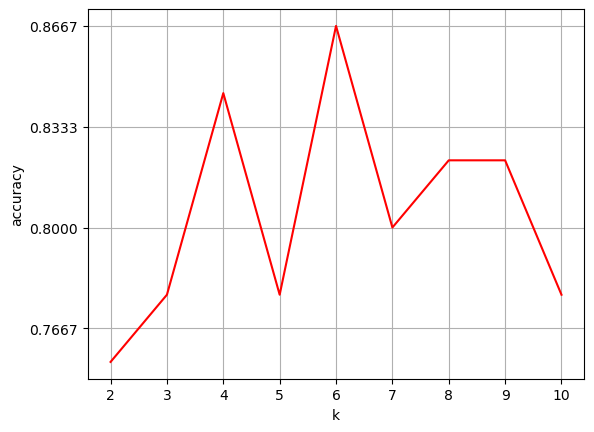

In [23]:
normal_accuracy = []  # 建立一个空的准确率列表
k_value = range(2, 11)
for k in k_value:
    y_predict = sklearn_classify(X_train, y_train, X_test, k)
    accuracy = get_accuracy(y_test, y_predict)
    normal_accuracy.append(accuracy)

plt.xlabel("k")
plt.ylabel("accuracy")
new_ticks = np.linspace(0.6, 0.9, 10)  # 设定 y 轴显示，从 0.6 到 0.9
plt.yticks(new_ticks)
plt.plot(k_value, normal_accuracy, c="r")
plt.grid(True)  # 给画布增加网格

从图像中可以得到，当 K=4 和 K=6 时，模型准确率相当。但机器学习选择最优模型时，我们一般会考虑到模型的泛化能力，所以这里选择 K=4，也就是更简单的模型。

## Kd树
KNN 算法的易于理解，很大程度上由于在对 KNN 实现输入示例分类时所用方法是线性扫描，即输入示例与每一个训练示例做距离计算。正因如此，当数据量特别大时，这样的计算会非常耗时。为了提高 KNN 搜索效率，减少计算距离的次数，可以通过构建 Kd 树的方法提高计算效率。

Kd 树（英文：K-dimension tree）是一种对 K 维空间中的实例点进行存储以便对其进行快速检索的树形数据结构。Kd 树是一种二叉树，表示对 K 维空间的一个划分，构造 Kd 树相当于不断地用垂直于坐标轴的超平面将 K 维空间切分，构成一系列的 K 维超矩形区域。Kd 树的每个结点对应于一个 K 维超矩形区域。利用 Kd 树可以省去对大部分数据点的搜索，从而减少搜索的计算量。


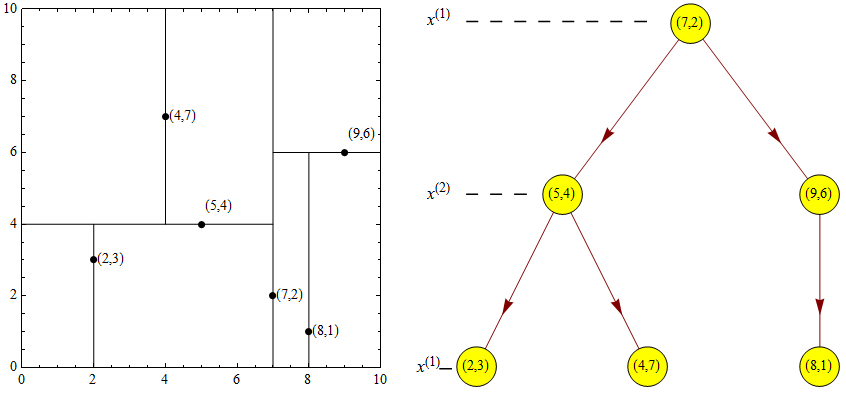

## Kd树实现
前面的讲解中，Kd 树的主要目的便是提高数据搜索的速度，减少内存和时间的消耗，以下我们就用代码来直观感受下 Kd 树的优点。采用 scikit-learn 库实现 Kd 树很简单，只需要在函数调用时传入 kd_tree 参数即可。

实际上 scikit-learn 提供的方法已不再是普通的 KNN 实现，而是集成了多种优化搜索方法，所以这里无法对比采用和未采用 Kd 树搜索的时间。默认的 algorithm='auto' 参数会自动选择优化搜索方法以减少训练用时。

In [24]:
kd_x = np.random.random((100000, 2))  # 生成 10 万条测试数据
kd_y = np.random.randint(4, size=(100000))

kd_knn = KNeighborsClassifier(n_neighbors=5, algorithm="kd_tree")  # kd 树搜索

In [25]:
%time kd_knn.fit(kd_x, kd_y)  # 输出 kd 树搜索训练用时

CPU times: total: 15.6 ms
Wall time: 134 ms


KNeighborsClassifier(algorithm='kd_tree')